
# Project: TMDB Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
> **TMDb Movie Dataset**: This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
**i.e.**: Certain columns contain multiple values separated by pipe (|) characters and there are some missing values. So will start with cleaning the data and then analyze it by asking questions and find their answers.
Let's load the data & start wrangling it

### Question(s) for Analysis
> Q1: What is the most popular movie in the dataset & the features associated to it?
>
> Q2: What is the movie that achieved the highest revenue?
>
> Q3: What is the movie that achieved the highest profit?
>
> Q4: How is the number of movies released evolved over the years?
>
> Q5: How is the movies profit changes over the years?
>
> Q6: How is the movies popularity changes over the years?
>
> Q7: Who is the director with best total profits?
>
> Q8: Who is the best director per year in term of profit?
>
> Q9: Who is the best director per year in term of movie popularity?
>
> Q10: What is the best rated movie?
>
> Q11: How is the revenue, ratings & popularity distributed according to the movie genres?
>
> Q12: What is the relatioship between Genres and Budget, Revenue & Profit?
>
> Q13: What is the distribution of the movies according to their Genres?
>

In [1]:
# import statements for all of the needed packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

<a id='wrangling'></a>
## Data Wrangling

> In this section, we will load in the data, check its cleanliness, and then trim and clean it for further analysis.

In [2]:
# Load the data and print out a few lines.
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### General Properties

> Perform operations to inspect data types. look for instances of missing or possibly errant data.

In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



## Data Cleaning

### Check & Remove Duplicates

In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(10865, 21)

### locate the missing data & deal with it

In [9]:
# locating the missing data.
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Drop unnecessary columns

In [10]:
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)
df.head(1)

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015


In [11]:
# confirm dropping unnecessary columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   budget          10865 non-null  int64  
 2   revenue         10865 non-null  int64  
 3   original_title  10865 non-null  object 
 4   director        10821 non-null  object 
 5   runtime         10865 non-null  int64  
 6   genres          10842 non-null  object 
 7   release_date    10865 non-null  object 
 8   vote_count      10865 non-null  int64  
 9   vote_average    10865 non-null  float64
 10  release_year    10865 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1018.6+ KB


In [12]:
#locate the rest of missing data
df.isna().sum()

popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

### Fill Missing Data

In [13]:
df.fillna(0, inplace=True)

In [14]:
# Confirm filling missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   budget          10865 non-null  int64  
 2   revenue         10865 non-null  int64  
 3   original_title  10865 non-null  object 
 4   director        10865 non-null  object 
 5   runtime         10865 non-null  int64  
 6   genres          10865 non-null  object 
 7   release_date    10865 non-null  object 
 8   vote_count      10865 non-null  int64  
 9   vote_average    10865 non-null  float64
 10  release_year    10865 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1018.6+ KB


### Fix Data Types

In [15]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [16]:
# Confirm data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10865 non-null  float64       
 1   budget          10865 non-null  int64         
 2   revenue         10865 non-null  int64         
 3   original_title  10865 non-null  object        
 4   director        10865 non-null  object        
 5   runtime         10865 non-null  int64         
 6   genres          10865 non-null  object        
 7   release_date    10865 non-null  datetime64[ns]
 8   vote_count      10865 non-null  int64         
 9   vote_average    10865 non-null  float64       
 10  release_year    10865 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 1018.6+ KB


In [17]:
# Explore Data
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


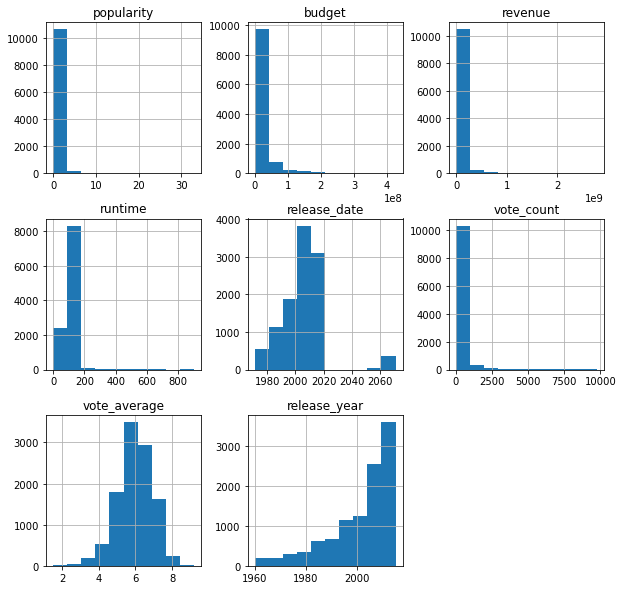

In [18]:
df.hist(figsize=(10, 10));

In [19]:
df.tail(1)

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
10865,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren,74,Horror,2066-11-15,15,1.5,1966


### Fix Release Date

In [20]:
# it is noticed that there is something wrong happening while adjusting the Release Date format.
# Let's fix it.
df.loc[df['release_date'].dt.year >= 2020, 'release_date'] -= pd.DateOffset(years=100)

In [21]:
#Confirm fixing the release date
df.tail(1)

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
10865,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren,74,Horror,1966-11-15,15,1.5,1966


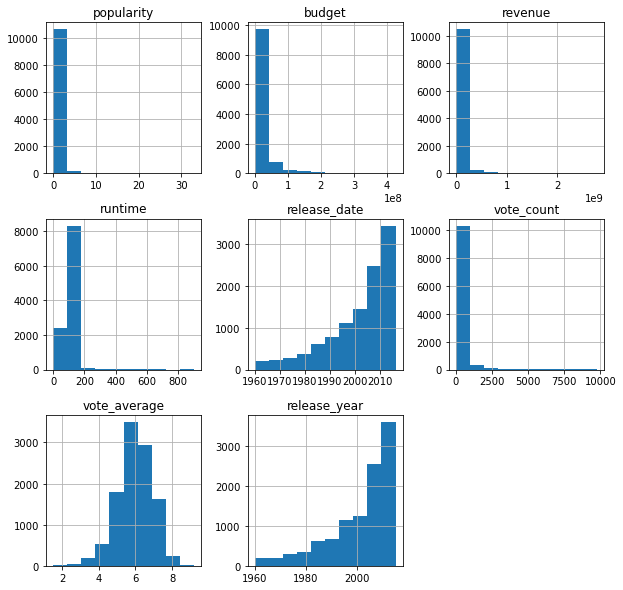

In [22]:
df.hist(figsize=(10, 10));

### Check Unique Values

In [23]:
df.nunique()

popularity        10814
budget              557
revenue            4702
original_title    10571
director           5068
runtime             247
genres             2040
release_date       5909
vote_count         1289
vote_average         72
release_year         56
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> After data cleaning, you're ready to move on to exploration. **Compute Statistics** and **Create Visualizations** with the goal of addressing the research questions that are posed in the introduction section.

### Q1: What is the most popular movie in the dataset & the features associated to it?

In [24]:
# Features of most popular movie
most_popular = df.loc[df.popularity.idxmax()]
most_popular

popularity                                        32.985763
budget                                            150000000
revenue                                          1513528810
original_title                               Jurassic World
director                                    Colin Trevorrow
runtime                                                 124
genres            Action|Adventure|Science Fiction|Thriller
release_date                            2015-06-09 00:00:00
vote_count                                             5562
vote_average                                            6.5
release_year                                           2015
Name: 0, dtype: object

In [25]:
print('The most popular movie is:', '\033[1m' + most_popular['original_title'] + '\033[0m',
      'directed by', '\033[1m' + most_popular['director'] + '\033[0m', 
      'with a popularity value', '\033[1m' + str("%.2f" %(most_popular['popularity'])) + '\033[0m', 
      '& rated', '\033[1m' + str(most_popular['vote_average']) + '\033[0m')

print('', 'Released on:', '\033[1m' + str(most_popular['release_date'].strftime('%Y-%m-%d')) + '\033[0m', ',\n',
      'Budget:', '\033[1m' + str("${:,.0f}".format(most_popular['budget'])) + '\033[0m', ',\n', 
      'Revenue:', '\033[1m' + str("${:,.0f}".format(most_popular['revenue'])) + '\033[0m', ',\n',
      'Profit about:', 
      '\033[1m' + str("${:,.0f}".format(most_popular['revenue'] - most_popular['budget'])) + '\033[0m')

print('', 'Classified as', '\033[1m' + most_popular['genres'] + '\033[0m')

The most popular movie is: Jurassic World directed by Colin Trevorrow with a popularity value 32.99 & rated 6.5
 Released on: 2015-06-09 ,
 Budget: $150,000,000 ,
 Revenue: $1,513,528,810 ,
 Profit about: $1,363,528,810
 Classified as Action|Adventure|Science Fiction|Thriller


>The most popular movie is: **Jurassic World** directed by **Colin Trevorrow** with a popularity value **32.99** & rated **6.5**.
>
> Released on: **2015-06-09**,
> Budget: **150,000,000** USD,
> Revenue: **1,513,528,810** USD,
> Profit about: **1,363,528,810** USD.
>
> Classified as: **Action|Adventure|Science Fiction|Thriller**.

### Q2: What is the movie that achieved the highest revenue?

In [26]:
highest_revenue = df.loc[df.revenue.idxmax()]
highest_revenue

popularity                                        9.432768
budget                                           237000000
revenue                                         2781505847
original_title                                      Avatar
director                                     James Cameron
runtime                                                162
genres            Action|Adventure|Fantasy|Science Fiction
release_date                           2009-12-10 00:00:00
vote_count                                            8458
vote_average                                           7.1
release_year                                          2009
Name: 1386, dtype: object

In [27]:
print('The highest revenue movie is:', '\033[1m' + highest_revenue['original_title'] + '\033[0m',
      'directed by', '\033[1m' + highest_revenue['director'] + '\033[0m', 
      'with a popularity value', '\033[1m' + str("%.2f" %(highest_revenue['popularity'])) + '\033[0m', 
      '& rated', '\033[1m' + str(highest_revenue['vote_average']) + '\033[0m')

print('','Released on:', '\033[1m' + str(highest_revenue['release_date'].strftime('%Y-%m-%d')) + '\033[0m', ',\n',
      'Budget:', '\033[1m' + str("${:,.0f}".format(highest_revenue['budget'])) + '\033[0m', ',\n',
      'Revenue:', '\033[1m' + str("${:,.0f}".format(highest_revenue['revenue'])) + '\033[0m', ',\n',
      'Profit about:', '\033[1m' + str("${:,.0f}".format(highest_revenue['revenue'] - highest_revenue['budget'])) + '\033[0m')

print('', 'classified as', '\033[1m' + highest_revenue['genres'] + '\033[0m')

The highest revenue movie is: Avatar directed by James Cameron with a popularity value 9.43 & rated 7.1
 Released on: 2009-12-10 ,
 Budget: $237,000,000 ,
 Revenue: $2,781,505,847 ,
 Profit about: $2,544,505,847
 classified as Action|Adventure|Fantasy|Science Fiction


>The highest revenue movie is: **Avatar** directed by **James Cameron** with a popularity value **9.43** & rated **7.1**.
>
> Released on: **2009-12-10**,
> Budget: **237,000,000** USD,
> Revenue: **2,781,505,847** USD,
> Profit about: **2,544,505,847** USD.
>
> Classified as: **Action|Adventure|Fantasy|Science Fiction**.

### Q3: What is the movie that achieved the highest profit?

In [28]:
# Calculating Profit
df['profit'] = df['revenue'] - df['budget']
df.head(1)

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1363528810


In [29]:
highest_profit = df.loc[df.profit.idxmax()]
highest_profit

popularity                                        9.432768
budget                                           237000000
revenue                                         2781505847
original_title                                      Avatar
director                                     James Cameron
runtime                                                162
genres            Action|Adventure|Fantasy|Science Fiction
release_date                           2009-12-10 00:00:00
vote_count                                            8458
vote_average                                           7.1
release_year                                          2009
profit                                          2544505847
Name: 1386, dtype: object

In [30]:
print('The highest profit movie is the same as the highest revenue movie:',
      '\033[1m' + highest_profit['original_title'] + '\033[0m',
      'directed by', '\033[1m' + highest_revenue['director'] + '\033[0m')

The highest profit movie is the same as the highest revenue movie: Avatar directed by James Cameron


>The highest profit movie is the same as the highest revenue movie: **Avatar** directed by **James Cameron**.

### Q4: How is the number of movies released evolved over the years?

In [31]:
movies_count = df.groupby('release_year').count()['genres']
movies_count.tail()

release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: genres, dtype: int64

In [32]:
print('Maximum number of released movies was {} movie in year {}'
      .format(('\033[1m' + str(movies_count.max()) + '\033[0m'), ('\033[1m' + str(movies_count.idxmax()) + '\033[0m')))

Maximum number of released movies was 700 movie in year 2014


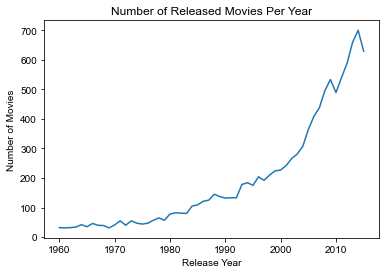

In [33]:
movies_count.plot()
sns.set(rc={'figure.figsize':(10, 10)})
plt.title("Number of Released Movies Per Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
sns.set_style("whitegrid");

>The number of released movies is nearly increasing every year achieving a maximum **700** movie released in year **2014**.

### Q5: How is the movies profit changes over the years?

In [34]:
movies_profit = df.groupby('release_year').sum()['profit']
movies_profit.tail()

release_year
2011    14677437926
2012    16394344772
2013    15467594656
2014    16407160045
2015    19165902961
Name: profit, dtype: int64

In [35]:
print('The maximum annual movies profit was {} in year {}'
      .format('\033[1m' + str("${:,.0f}".format(movies_profit.max())) + '\033[0m', '\033[1m' + str(movies_profit.idxmax()) + '\033[0m'))

The maximum annual movies profit was $19,165,902,961 in year 2015


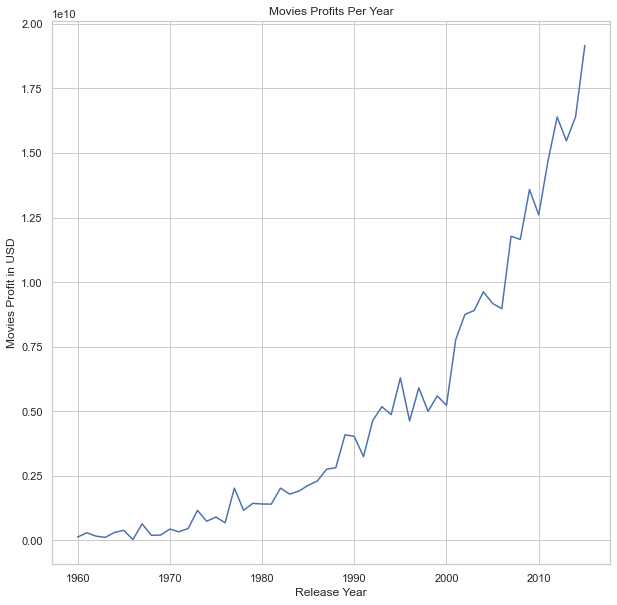

In [36]:
movies_profit.plot()
plt.title("Movies Profits Per Year")
plt.xlabel("Release Year")
plt.ylabel("Movies Profit in USD");

> The movies profit is also **increasing** over the years & the maximum annual movies profit was **19,165,902,961** USD in year **2015**.

### Q6: How is the movies popularity changes over the years?

In [37]:
movies_pobularity = df.groupby('release_year').mean()['popularity']
movies_pobularity.tail()

release_year
2011    0.675069
2012    0.607197
2013    0.627627
2014    0.887268
2015    1.030657
Name: popularity, dtype: float64

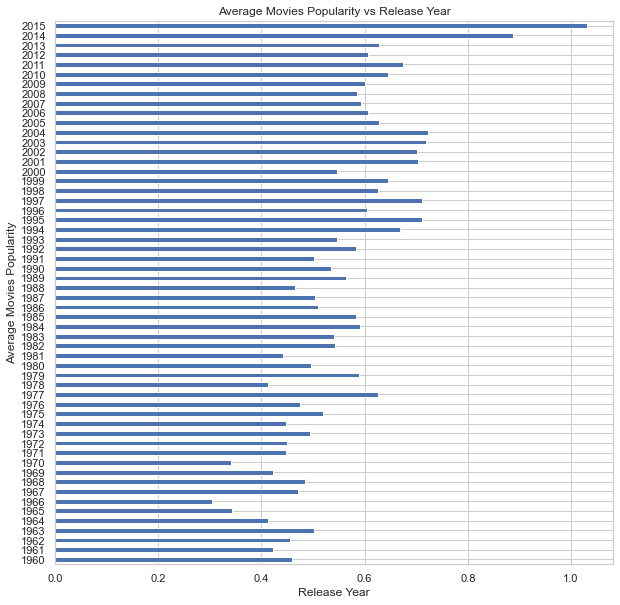

In [38]:
movies_pobularity.plot(kind='barh')
plt.title("Average Movies Popularity vs Release Year")
plt.xlabel("Release Year")
plt.ylabel("Average Movies Popularity");

> The movies popularity is in an **increasing** trend over the years.

### Q7: Who is the director with best total profits?

In [39]:
best_director = df.groupby('director').sum()['profit']
print('{} is the director who achieved the best total Profit {}.'
      .format('\033[1m' + best_director.idxmax() + '\033[0m', '\033[1m' + str("${:,.0f}".format(best_director.max())) + '\033[0m'))

Steven Spielberg is the director who achieved the best total Profit $7,428,613,772.


> **Steven Spielberg** is the director who achieved the best total Profits of about **7,428,613,772** USD.

### Q8: Who is the best director per year in term of profit?

In [40]:
best_director_year_profit = df.groupby(['release_year', 'director']).sum().idxmax()['profit']
best_director_year_profit

(2009, 'James Cameron')

In [41]:
best_director_profit = df.groupby(['release_year', 'director']).sum().max()['profit']
best_director_profit

2544505847.0

In [42]:
print('{} is the best annual profit achieved by the director {} in {}.'
      .format('\033[1m' + str("${:,.0f}".format(best_director_profit)) + '\033[0m', '\033[1m' + best_director_year_profit[1] + '\033[0m', '\033[1m' + str(best_director_year_profit[0]) + '\033[0m'))

$2,544,505,847 is the best annual profit achieved by the director James Cameron in 2009.


> **2,544,505,847** USD is the best annual profit achieved by the director **James Cameron** in **2009**.

### Q9: Who is the best director per year in term of movie popularity?

In [43]:
best_director_year_popularity = df.groupby(['release_year', 'director']).mean().idxmax()['popularity']
best_director_year_popularity

(2015, 'Colin Trevorrow')

In [44]:
best_director = df.groupby('director').sum()['profit']
print('{} is the most popular director in {} with average popularity of {}.'
      .format('\033[1m' + str(best_director_year_popularity[1]) + '\033[0m', '\033[1m' + str(best_director_year_popularity[0]) + '\033[0m', 
              '\033[1m' + str("%.2f" %(df.groupby(['release_year', 'director']).mean().max()['popularity'])) + '\033[0m'))

Colin Trevorrow is the most popular director in 2015 with average popularity of 32.99.


> **Colin Trevorrow** is the most popular director in **2015** with average popularity of **32.99**.

### Q10: What is the best rated movie?

In [45]:
best_rated_movie = df.loc[df.vote_average.idxmax()]
best_rated_movie

popularity                             0.006925
budget                                        0
revenue                                       0
original_title    The Story of Film: An Odyssey
director                           Mark Cousins
runtime                                     900
genres                              Documentary
release_date                2011-09-03 00:00:00
vote_count                                   14
vote_average                                9.2
release_year                               2011
profit                                        0
Name: 3894, dtype: object

In [46]:
print('The best rated movie is:', '\033[1m' + best_rated_movie['original_title'] + '\033[0m',
      'directed by', '\033[1m' + best_rated_movie['director'] + '\033[0m', 
      'with a popularity value', '\033[1m' + str("%.2f" %(best_rated_movie['popularity'])) + '\033[0m', 
      '& rated', '\033[1m' + str(best_rated_movie['vote_average']) + '\033[0m')

print('','Released on:', '\033[1m' + str(best_rated_movie['release_date'].strftime('%Y-%m-%d')) + '\033[0m', ',\n',
      'classified as', '\033[1m' + best_rated_movie['genres'] + '\033[0m')

The best rated movie is: The Story of Film: An Odyssey directed by Mark Cousins with a popularity value 0.01 & rated 9.2
 Released on: 2011-09-03 ,
 classified as Documentary


> The best rated movie is: **The Story of Film: An Odyssey** directed by **Mark Cousins** with a popularity value **0.01** & rated **9.2**. Released on: **2011-09-03** & classified as **Documentary**.

### Q11: How is the revenue, ratings & popularity distributed according to the movie genres?

#### Split the existing genres column that contains multiple values separated by pipe (|) character into multiple rows with single genre values.

In [47]:
df1 = df['genres'].str.split('|', expand = True).stack().reset_index(level=1, drop=True).rename('genres')

In [48]:
df2 = df.drop('genres', axis=1)
df2.head(1)

,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1363528810


In [49]:
df = df2.join(df1)
df.head(1)

,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,profit,genres
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1363528810,Action


In [50]:
df.shape

(26978, 12)

### Relationship between Revenue & Genres:

In [51]:
genres_revenue = df.groupby('genres').revenue.mean().sort_values(ascending=False)
genres_revenue.to_frame().head()

,revenue
genres,
Adventure,1.131379e+08
Fantasy,9.631366e+07
Animation,7.525606e+07
Action,7.279473e+07
Family,7.243318e+07


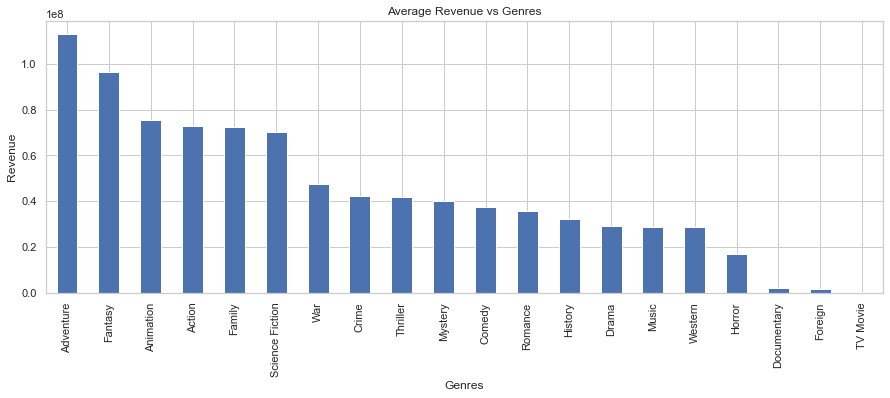

In [52]:
genres_revenue.plot(kind='bar', figsize=(15,5));
plt.xlabel('Genres')
plt.ylabel('Revenue')
plt.title('Average Revenue vs Genres');

### Relationship between Ratings & Genres:

In [53]:
genres_ratings = df.groupby('genres').vote_average.mean().sort_values(ascending = False)
genres_ratings.to_frame().head()

,vote_average
genres,
Documentary,6.908462
Music,6.480392
History,6.410479
Animation,6.403147
War,6.297778


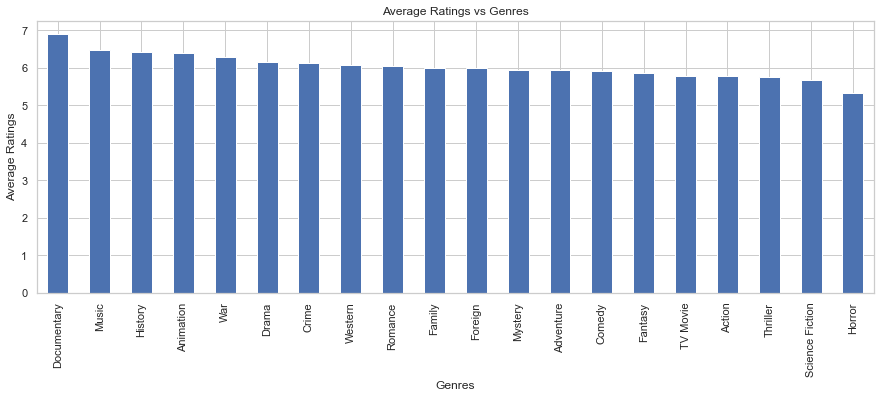

In [54]:
genres_ratings.plot(kind='bar', figsize=(15,5));
plt.xlabel('Genres')
plt.ylabel('Average Ratings')
plt.title('Average Ratings vs Genres');

### Relationship between Popularity & Genres:

In [55]:
genres_popularity = df.groupby('genres').popularity.mean().sort_values(ascending = False)
genres_popularity.to_frame().head()

,popularity
genres,
Adventure,1.154259
Science Fiction,1.001548
Fantasy,0.992840
Action,0.926274
Animation,0.852182


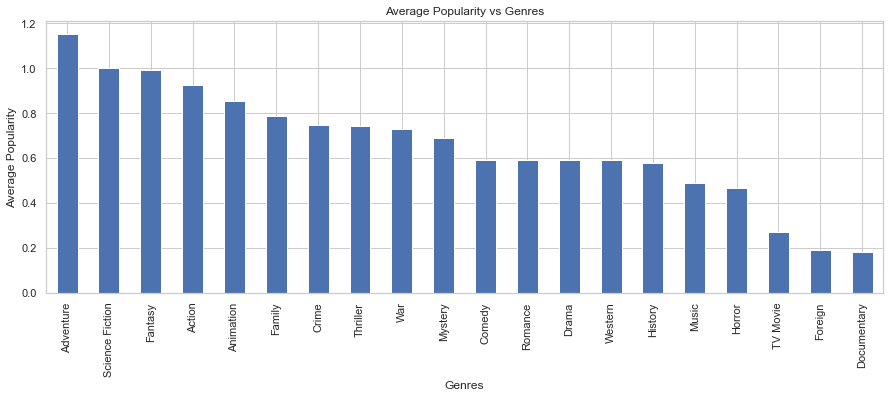

In [56]:
genres_popularity.plot(kind='bar', figsize=(15,5));
plt.xlabel('Genres')
plt.ylabel('Average Popularity')
plt.title('Average Popularity vs Genres');

> The relationship between the **Genres** and **Revenue, Ratings & Popularity** shows that:
>> The **Adventure** movies are the most popular & having the highest revenues.
>>
>> while the **Documentry** movies gets the highest ratings with lowest popularity and revenues as well.
>>
>> This means that we cannot rely on the **ratings** in our statistics.

### Q12: What is the relatioship between Genres and Budget, Revenue & Profit?

### Relationship between Budget & Genres:

In [57]:
genres_budget = df.groupby('genres').budget.mean().sort_values(ascending=False)
genres_budget.to_frame().head()

,budget
genres,
Adventure,3.754369e+07
Fantasy,3.261259e+07
Action,2.772782e+07
Science Fiction,2.497268e+07
Family,2.335934e+07


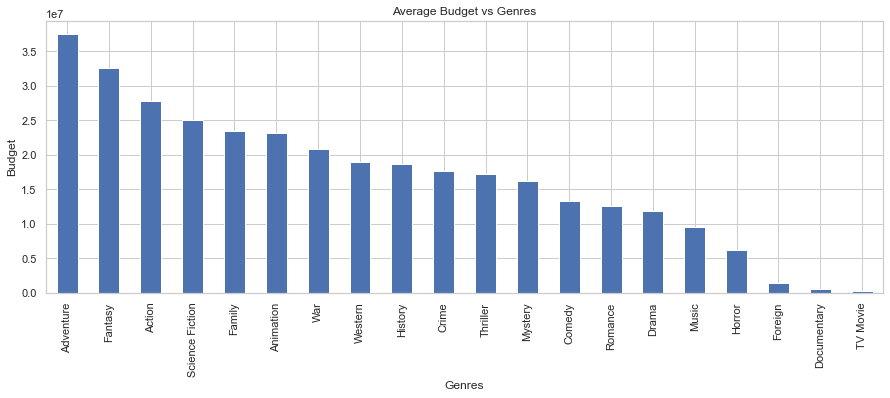

In [58]:
genres_budget.plot(kind='bar', figsize=(15,5));
plt.xlabel('Genres')
plt.ylabel('Budget')
plt.title('Average Budget vs Genres');

### Relationship between Profit & Genres:

In [59]:
genres_profit = df.groupby('genres').profit.mean().sort_values(ascending=False)
genres_profit.to_frame().head()

,profit
genres,
Adventure,7.559417e+07
Fantasy,6.370107e+07
Animation,5.209628e+07
Family,4.907384e+07
Science Fiction,4.516788e+07


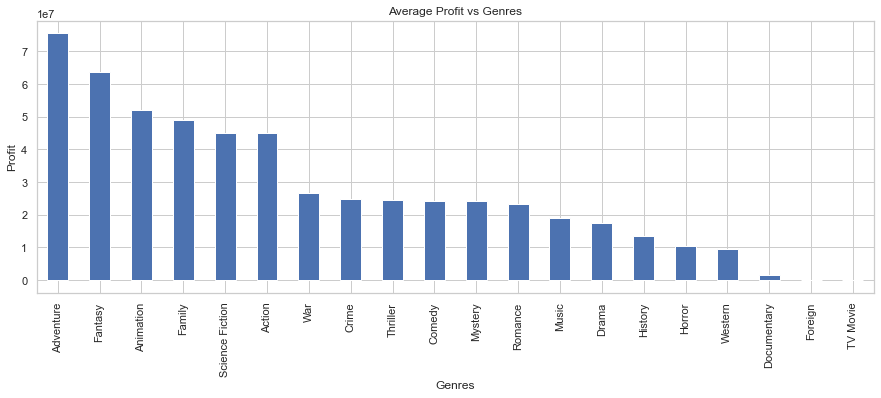

In [60]:
genres_profit.plot(kind='bar', figsize=(15,5));
plt.xlabel('Genres')
plt.ylabel('Profit')
plt.title('Average Profit vs Genres');

### Relationship between Genres and Budget, Revenue & Profit:

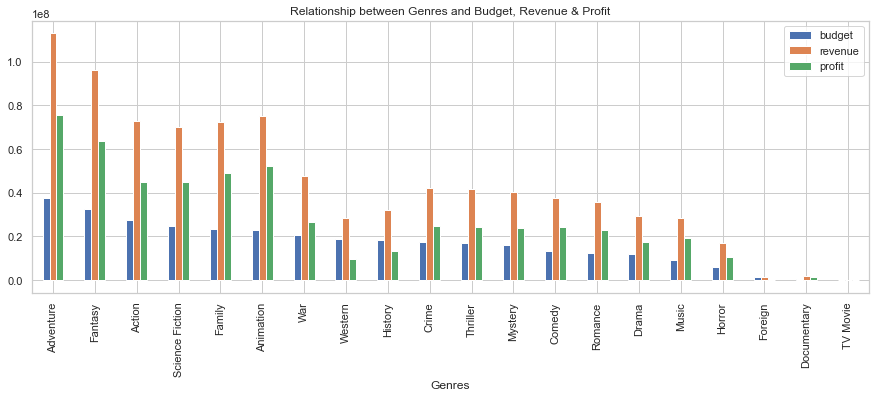

In [61]:
pd.concat([genres_budget,genres_revenue,genres_profit],axis=1).plot(kind='bar', figsize=(15,5));
plt.xlabel('Genres')
plt.title('Relationship between Genres and Budget, Revenue & Profit');

> The relationship between **Genres** and **Budget, Revenue & Profit** shows that:
>
>> The top profitable movies are with the following genres:
>>
>> **1. Adventure.**
>>
>> **2. Fantasy.**
>>
>> **3. Animation.**
>>
>> **4. Family.**
>>
>> **5. Science Fiction.**
>>
> This means that investing in these genres will be a good choice.

### Q13: What is the distribution of the movies according to their Genres?

In [62]:
genres_count = df.groupby('genres').release_year.count().sort_values(ascending=False)
genres_count

genres
Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: release_year, dtype: int64

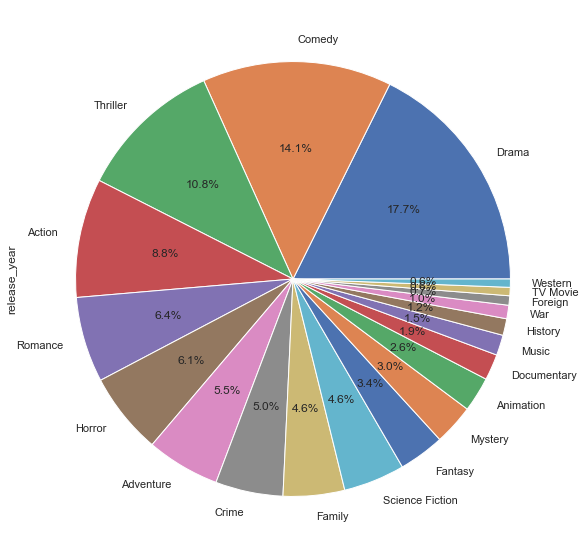

In [63]:
genres_count.plot.pie(autopct="%.1f%%");

In [64]:
genres_count.head()

genres
Drama       4760
Comedy      3793
Thriller    2907
Action      2384
Romance     1712
Name: release_year, dtype: int64

> Most of the released movies are classified in the following genres: **Drama**, **Comedy**, **Thriller**, **Action** & **Romance**.

<a id='conclusions'></a>
## Conclusions
>The most popular movie is: **Jurassic World** directed by **Colin Trevorrow** with a popularity value **32.99** & rated **6.5**. Released on: **2015-06-09**, Budget: **150,000,000** USD, Revenue: **1,513,528,810** USD, Profit about: **1,363,528,810** USD. Classified as: **Action|Adventure|Science Fiction|Thriller**.

>The highest revenue movie is: **Avatar** directed by **James Cameron** with a popularity value **9.43** & rated **7.1**. Released on: **2009-12-10**, Budget: **237,000,000** USD, Revenue: **2,781,505,847** USD, Profit about: **2,544,505,847** USD. Classified as: **Action|Adventure|Fantasy|Science Fiction**.

> The number of released movies is nearly increasing every year achieving a maximum **700** movie released in year **2014**.

> The movies profit is also **increasing** over the years & the maximum annual movies profit was **19,165,902,961** USD in year **2015**.

> The movies popularity is in an **increasing** trend over the years.

> **Steven Spielberg** is the director who achieved the best total Profits of about **7,428,613,772** USD.

> **2,544,505,847** USD is the best annual profit achieved by the director **James Cameron** in **2009**.

> **Colin Trevorrow** is the most popular director in **2015** with average popularity of **32.99**.

> The best rated movie is: **The Story of Film: An Odyssey** directed by **Mark Cousins** with a popularity value **0.01** & rated **9.2**. Released on: **2011-09-03** & classified as **Documentary**.

> The relationship between the **Genres** and **Revenue, Ratings & Popularity** shows that:
> The **Adventure** movies are the most popular & having the highest revenues while the **Documentry** movies gets the highest ratings with lowest popularity and revenues as well. This means that we cannot rely on the **ratings** in our statistics.

> The relationship between **Genres** and **Budget, Revenue & Profit** shows that:
> **Adventure**, **Fantasy**, **Animation**, **Family** & **Science Fiction** are the top profitable genres so investing in these genres will be a good choice.

> Most of the released movies are classified in the following genres: **Drama**, **Comedy**, **Thriller**, **Action** & **Romance**.

### Limitations
> **Rating**: Sometimes the movie rating is misleading due to its low popularity and low voting counts. 

In [65]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1